## Timeseries Explorer

Achievements now have completion dates for each user and a tally of how many achievements each player completed for every month from Jan 2010 to may 2020.

## Set up timeseries dataframe
Arrange the data so that rows = date, columns = achievements per month, index = player_realm

In [1]:
import os
import pandas as pd
import datetime as dt
import config as cn
from IPython.display import HTML
import numpy as np
import seaborn as sns
import custom_funcs as cf

file_in = os.path.join(os.path.join(cn.clean_dir, 'final_time_stats.csv'))
player_cols = ['player', 'realm', 'last_login', 'time_since_login', 'status','gear_score', '2020-05']
dfa_dates = cf.get_dates()
keep_cols = player_cols + dfa_dates[-74:]
keep_cols.append('engagement')
df = pd.read_csv(file_in)
extra_cols = [col for col in df.columns.values if 'unnamed' in col.lower() or  col not in keep_cols]
df = df.drop(extra_cols, axis = 1)
df = df.drop_duplicates()


df_original = df.copy()
display(HTML(df.head().to_html()))



/Users/haleyspeed/Docs/insight/ins_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/haleyspeed/Docs/insight/ins_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,20

,player,realm,gear_score,last_login,time_since_login,2015-01,2016-01,2017-01,2018-01,2019-01,2020-01,2015-02,2016-02,2017-02,2018-02,2019-02,2020-02,2015-03,2016-03,2017-03,2018-03,2019-03,2020-03,2014-04,2015-04,2016-04,2017-04,2018-04,2019-04,2020-04,2014-05,2015-05,2016-05,2017-05,2018-05,2019-05,2020-05,2014-06,2015-06,2016-06,2017-06,2018-06,2019-06,2014-07,2015-07,2016-07,2017-07,2018-07,2019-07,2014-08,2015-08,2016-08,2017-08,2018-08,2019-08,2014-09,2015-09,2016-09,2017-09,2018-09,2019-09,2014-10,2015-10,2016-10,2017-10,2018-10,2019-10,2014-11,2015-11,2016-11,2017-11,2018-11,2019-11,2014-12,2015-12,2016-12,2017-12,2018-12,2019-12,engagement,status
0,kurdan,frostmourne,476.0,2020-06-16,-11 days +00:00:00.000000000,18.0,2.0,33.0,1.0,15.0,41.0,9.0,0.0,15.0,0.0,2.0,11.0,9.0,1.0,5.0,0.0,3.0,5.0,2.0,1.0,0.0,0.0,0.0,1.0,31.0,4.0,6.0,1.0,0.0,0.0,0.0,10.0,9.0,7.0,0.0,0.0,0.0,0.0,1.0,14.0,0.0,8.0,7.0,1.0,4.0,7.0,1.0,23.0,18.0,1.0,7.0,7.0,1.0,9.0,3.0,0.0,2.0,2.0,0.0,5.0,22.0,0.0,68.0,1.0,0.0,1.0,1.0,0.0,27.0,4.0,16.0,1.0,70.0,15.0,0.0,active
1,ßlors,frostmourne,354.0,2020-04-09,57 days 00:00:00.000000000,6.0,3.0,2.0,2.0,4.0,6.0,5.0,0.0,1.0,0.0,0.0,0.0,6.0,1.0,3.0,1.0,2.0,0.0,3.0,2.0,0.0,1.0,1.0,1.0,7.0,0.0,3.0,0.0,1.0,0.0,0.0,3.0,5.0,1.0,5.0,0.0,1.0,0.0,1.0,10.0,0.0,16.0,2.0,3.0,3.0,27.0,7.0,3.0,55.0,2.0,3.0,0.0,4.0,12.0,4.0,0.0,3.0,5.0,0.0,0.0,2.0,0.0,9.0,0.0,0.0,2.0,1.0,0.0,9.0,4.0,3.0,0.0,2.0,4.0,1.0,risk
2,beylar,frostmourne,478.0,2020-06-16,-11 days +00:00:00.000000000,14.0,1.0,10.0,4.0,24.0,8.0,18.0,0.0,5.0,7.0,8.0,13.0,10.0,1.0,28.0,0.0,2.0,12.0,2.0,2.0,0.0,22.0,0.0,1.0,12.0,0.0,4.0,0.0,12.0,29.0,0.0,9.0,3.0,0.0,0.0,12.0,13.0,3.0,1.0,1.0,0.0,5.0,22.0,22.0,3.0,2.0,38.0,9.0,78.0,9.0,2.0,0.0,59.0,9.0,20.0,6.0,29.0,2.0,15.0,4.0,7.0,0.0,114.0,20.0,11.0,9.0,7.0,0.0,57.0,25.0,3.0,13.0,1.0,5.0,0.0,active
3,tswiftes,frostmourne,356.0,2020-05-08,28 days 00:00:00.000000000,3.0,0.0,2.0,3.0,20.0,8.0,6.0,8.0,0.0,5.0,6.0,13.0,3.0,1.0,6.0,0.0,2.0,12.0,68.0,2.0,2.0,3.0,19.0,1.0,22.0,15.0,4.0,0.0,9.0,5.0,0.0,8.0,4.0,0.0,2.0,0.0,30.0,2.0,2.0,2.0,4.0,0.0,32.0,22.0,5.0,151.0,7.0,3.0,30.0,9.0,6.0,30.0,5.0,3.0,8.0,6.0,5.0,7.0,2.0,4.0,7.0,0.0,23.0,7.0,0.0,4.0,6.0,2.0,15.0,11.0,1.0,11.0,2.0,4.0,0.0,active
4,soulwizz,frostmourne,310.0,2019-07-20,321 days 00:00:00.000000000,3.0,0.0,1.0,12.0,19.0,8.0,4.0,2.0,0.0,0.0,6.0,13.0,1.0,4.0,2.0,0.0,2.0,12.0,7.0,2.0,7.0,8.0,1.0,1.0,12.0,2.0,3.0,0.0,5.0,7.0,0.0,8.0,3.0,0.0,1.0,0.0,6.0,2.0,1.0,1.0,0.0,0.0,15.0,19.0,3.0,4.0,1.0,3.0,25.0,9.0,2.0,0.0,0.0,1.0,24.0,6.0,4.0,2.0,0.0,122.0,7.0,0.0,11.0,1.0,0.0,39.0,4.0,1.0,5.0,17.0,1.0,42.0,2.0,4.0,2.0,lapsed


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242957 entries, 0 to 363669
Data columns (total 81 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   player            242956 non-null  object 
 1   realm             242957 non-null  object 
 2   gear_score        242940 non-null  float64
 3   last_login        242940 non-null  object 
 4   time_since_login  242957 non-null  object 
 5   2015-01           144838 non-null  float64
 6   2016-01           144838 non-null  float64
 7   2017-01           144838 non-null  float64
 8   2018-01           144838 non-null  float64
 9   2019-01           144838 non-null  float64
 10  2020-01           144838 non-null  float64
 11  2015-02           144838 non-null  float64
 12  2016-02           144838 non-null  float64
 13  2017-02           144838 non-null  float64
 14  2018-02           144838 non-null  float64
 15  2019-02           144838 non-null  float64
 16  2020-02           14

In [3]:
df = df.drop(['player', 'realm', 'last_login', 'time_since_login', 'status'], axis = 1)
df.to_csv(os.path.join(cn.clean_dir,'stripped_final_time_stats.csv'))
df.describe().to_csv(os.path.join(cn.clean_dir, 'eda', 'time_series_descriptive_stats.csv'))
df.describe()

,gear_score,2015-01,2016-01,2017-01,2018-01,2019-01,2020-01,2015-02,2016-02,2017-02,...,2017-11,2018-11,2019-11,2014-12,2015-12,2016-12,2017-12,2018-12,2019-12,engagement
count,242940.000000,144838.000000,144838.000000,144838.000000,144838.000000,144838.000000,144838.000000,144838.000000,144838.000000,144838.000000,...,144838.000000,144838.000000,144838.000000,144838.000000,144838.000000,144838.000000,144838.00000,144838.000000,144838.000000,242957.000000
mean,422.762538,6.974475,5.342969,6.785947,6.525649,8.827145,9.146909,5.315746,4.392204,5.343812,...,5.628488,7.517585,7.487890,9.990804,6.899764,6.001954,6.50640,8.552037,6.980226,0.380545
std,52.731695,13.800024,13.759982,13.816179,13.521400,14.406265,16.154893,11.170896,11.634628,12.633190,...,12.913664,13.403987,15.692877,17.119356,14.228129,13.017865,14.19111,13.318722,14.499861,0.629304
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,400.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000,2.000000,1.000000,0.000000
50%,437.000000,2.000000,2.000000,2.000000,3.000000,4.000000,4.000000,2.000000,1.000000,1.000000,...,2.000000,4.000000,3.000000,4.000000,3.000000,2.000000,2.00000,4.000000,3.000000,0.000000
75%,462.000000,7.000000,5.000000,6.000000,6.000000,10.000000,11.000000,6.000000,4.000000,5.000000,...,5.000000,8.000000,7.000000,11.000000,6.000000,6.000000,7.00000,10.000000,6.000000,1.000000
max,486.000000,413.000000,402.000000,426.000000,414.000000,368.000000,326.000000,336.000000,393.000000,315.000000,...,374.000000,466.000000,367.000000,399.000000,490.000000,496.000000,366.00000,328.000000,486.000000,2.000000


## Transpose Data so the x = time and y = player achievements/month

In [4]:
#df.index = [float(str(i).replace('-','')) for i in df.index.values] 

df_m = df.groupby('engagement').mean()
display(HTML(df_m.head().to_html()))

,gear_score,2015-01,2016-01,2017-01,2018-01,2019-01,2020-01,2015-02,2016-02,2017-02,2018-02,2019-02,2020-02,2015-03,2016-03,2017-03,2018-03,2019-03,2020-03,2014-04,2015-04,2016-04,2017-04,2018-04,2019-04,2020-04,2014-05,2015-05,2016-05,2017-05,2018-05,2019-05,2020-05,2014-06,2015-06,2016-06,2017-06,2018-06,2019-06,2014-07,2015-07,2016-07,2017-07,2018-07,2019-07,2014-08,2015-08,2016-08,2017-08,2018-08,2019-08,2014-09,2015-09,2016-09,2017-09,2018-09,2019-09,2014-10,2015-10,2016-10,2017-10,2018-10,2019-10,2014-11,2015-11,2016-11,2017-11,2018-11,2019-11,2014-12,2015-12,2016-12,2017-12,2018-12,2019-12
engagement,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,435.509108,7.238193,5.529938,7.009777,6.706969,8.930748,9.899198,5.536975,4.557593,5.501440,6.324389,6.686662,9.573233,5.069935,4.168539,5.860270,5.514129,7.070387,11.738599,3.522269,4.253099,3.965790,7.184168,5.108873,6.096285,17.835436,2.894791,3.990926,4.015890,6.260568,4.895183,6.466307,19.905110,3.409863,5.457504,4.498499,7.361219,5.736752,7.825428,3.324490,6.076651,6.828359,5.963753,7.824686,11.205780,3.883147,5.505907,10.417773,5.490168,19.900473,7.960179,3.950292,4.628191,12.658636,6.657753,14.793959,5.027966,6.052710,4.230484,9.085604,5.321017,10.423957,5.504663,14.721223,5.405035,7.246293,5.819325,7.600325,7.771082,10.280383,7.169653,6.142500,6.642666,8.661858,7.384899
1.0,396.685031,6.313719,4.878700,6.208309,6.113611,8.479049,7.979753,4.801815,4.025193,4.970502,6.183731,6.258438,7.646711,4.493529,3.524001,5.002665,5.415464,6.651349,8.199595,3.141008,3.761936,3.359953,6.418463,5.313693,5.827648,9.012891,2.596145,3.541352,3.363233,5.573669,4.654297,6.216125,8.980804,3.115764,4.729363,4.051334,6.578487,5.430457,7.074707,2.907430,5.187678,6.246495,5.178836,7.832697,9.241293,3.555473,4.684743,9.625259,4.880648,18.998437,7.033958,3.466491,3.814244,10.865220,5.855019,14.520003,4.461954,5.260847,3.407955,8.107896,4.811374,10.387683,5.139957,12.574182,4.856121,6.744637,5.143545,7.108101,7.479997,9.257874,6.290192,5.608498,6.169430,8.065122,6.581614
2.0,383.163174,6.895450,5.260568,6.824782,6.205227,9.353340,4.403033,4.995321,4.044369,5.160374,5.796709,7.089384,4.703614,4.831397,3.546305,5.171668,5.260407,7.464505,5.347531,3.358341,4.180058,3.439981,6.372217,4.916425,6.586480,6.806389,2.600678,4.153921,3.674088,5.588577,4.473863,7.769442,9.099226,3.024201,5.074702,4.200549,6.697967,6.548403,9.088900,2.978703,5.253792,6.584221,5.478541,9.576476,11.743788,3.516457,4.626976,11.035657,5.629881,25.532914,8.212649,3.488383,3.656663,13.196031,6.221684,19.315102,3.356083,5.500645,3.387544,9.502581,4.940142,12.696676,2.457083,13.860762,4.642627,7.800904,5.614069,8.765570,2.985802,9.950468,6.399322,6.219910,6.437561,9.852210,2.985318


## Get mean achievements per month

In [5]:
dft = df_m.T.reset_index()
dft = dft.iloc[1:][:]
dft.columns.values[0] = 'dates'
dft.dates = pd.to_datetime(dft.dates)
dft = dft.sort_values('dates')
dft = dft.set_index('dates')
dft.columns = ['active','risk','lapsed']
#dft = dft.astype(float).diff(baseline)
dft.to_csv(os.path.join(cn.clean_dir, 'eda', 'time_series_plot_data.csv'))
display(HTML(dft.to_html()))

,active,risk,lapsed
dates,,,
2014-04-01,3.522269,3.141008,3.358341
2014-05-01,2.894791,2.596145,2.600678
2014-06-01,3.409863,3.115764,3.024201
2014-07-01,3.324490,2.907430,2.978703
2014-08-01,3.883147,3.555473,3.516457
2014-09-01,3.950292,3.466491,3.488383
2014-10-01,6.052710,5.260847,5.500645
2014-11-01,14.721223,12.574182,13.860762
2014-12-01,10.280383,9.257874,9.950468


## Plot mean achievements per month

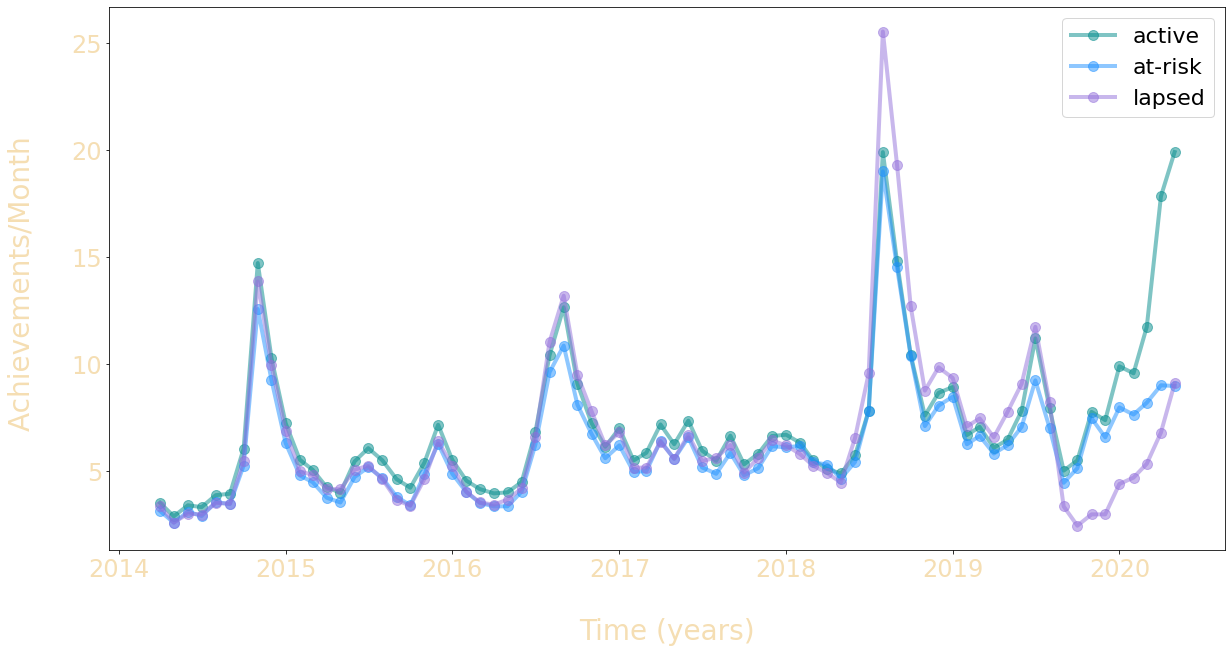

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime as dt
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(20, 10))
a = ax.plot_date(sorted(dft.index), dft.active, label = 'active',   fmt = '-4', 
                 color = 'darkcyan', alpha = 0.5, linewidth=4,marker = 'o', 
                 markersize=10)
a = ax.plot_date(sorted(dft.index), dft.risk, label = 'at-risk',   fmt = '-4', 
                 color = 'dodgerblue', alpha = 0.5, linewidth=4,marker = 'o', 
                 markersize=10)
a = ax.plot_date(sorted(dft.index), dft.lapsed, label = 'lapsed',   fmt = '-4', 
                 color = 'mediumpurple', alpha = 0.5, linewidth=4,marker = 'o', 
                 markersize=10)


a = ax.set_xlabel('\nTime (years)', fontsize = 28, color = 'wheat')
a = ax.set_ylabel('Achievements/Month \n', fontsize = 28, color = 'wheat')
a = ax.tick_params(labelsize = 24, labelcolor = 'wheat')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize = 22)

In [7]:
df.corr()

,gear_score,2015-01,2016-01,2017-01,2018-01,2019-01,2020-01,2015-02,2016-02,2017-02,...,2017-11,2018-11,2019-11,2014-12,2015-12,2016-12,2017-12,2018-12,2019-12,engagement
gear_score,1.000000,0.056131,0.038201,0.086675,0.051566,0.106387,0.207179,0.061909,0.042608,0.062214,...,0.052965,0.064823,0.096322,0.078457,0.034838,0.065976,0.060879,0.106569,0.101913,-0.364365
2015-01,0.056131,1.000000,0.071682,0.087504,0.014434,0.019721,-0.003277,0.449444,0.066547,0.056973,...,0.026604,0.010744,-0.027632,0.468956,0.097902,0.073942,0.028306,0.028127,-0.027578,-0.023873
2016-01,0.038201,0.071682,1.000000,0.084290,0.026753,0.013263,-0.000503,0.067995,0.404627,0.057649,...,0.034673,0.013069,-0.014852,0.073346,0.389317,0.074065,0.038586,0.025647,-0.016695,-0.017121
2017-01,0.086675,0.087504,0.084290,1.000000,0.047541,0.041671,0.010686,0.085853,0.084707,0.426362,...,0.070545,0.027289,-0.035043,0.117791,0.081499,0.467436,0.082047,0.056720,-0.038514,-0.019653
2018-01,0.051566,0.014434,0.026753,0.047541,1.000000,0.046159,0.000486,0.016774,0.033562,0.043352,...,0.195338,0.041718,-0.015395,0.022426,0.029915,0.043277,0.413871,0.056427,-0.020963,-0.018254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12,0.065976,0.073942,0.074065,0.467436,0.043277,0.032499,-0.003005,0.078770,0.077426,0.240165,...,0.061884,0.024018,-0.029254,0.087978,0.073388,1.000000,0.068078,0.045013,-0.032809,-0.011963
2017-12,0.060879,0.028306,0.038586,0.082047,0.413871,0.049947,0.009879,0.039640,0.037135,0.071725,...,0.411978,0.038177,-0.018093,0.035460,0.037194,0.068078,1.000000,0.060215,-0.025628,-0.012146
2018-12,0.106569,0.028127,0.025647,0.056720,0.056427,0.427189,0.021517,0.032447,0.026922,0.038805,...,0.044635,0.399984,-0.024831,0.037280,0.017228,0.045013,0.060215,1.000000,-0.015446,-0.002664
2019-12,0.101913,-0.027578,-0.016695,-0.038514,-0.020963,-0.016314,0.332555,-0.031225,-0.015958,-0.030303,...,-0.020938,-0.015504,0.337055,-0.044077,-0.021583,-0.032809,-0.025628,-0.015446,1.000000,-0.055248


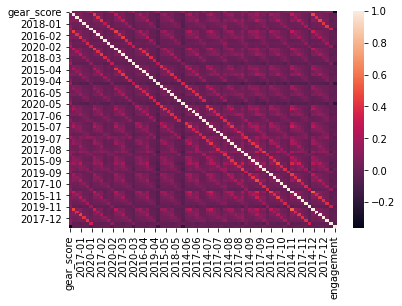

In [8]:
sns.heatmap(df.corr())

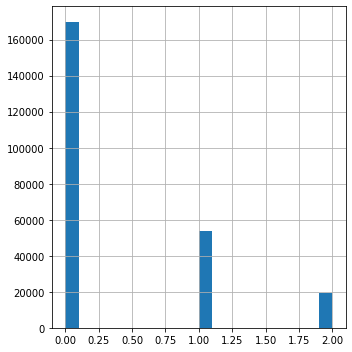

In [9]:
h = df.engagement.hist(bins = 20, figsize = (5,5))
plt.tight_layout()

## Stratified Shuffle Split

In [10]:
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit

y = df.engagement
X = df.drop('engagement', axis = 1)

split = StratifiedShuffleSplit(n_splits = 10, test_size = 0.25, random_state = 17)
for train_index, test_index in split.split(df, df.engagement):
    strat_train = df.iloc[train_index][:]
    strat_test = df.iloc[test_index][:]
    whole_training_set = df_original.iloc[train_index][:]
    whole_test_set = df_original.iloc[test_index][:]
    whole_training_set.to_csv(os.path.join(cn.clean_dir, 'whole_training_set.csv'), index = False)
    whole_test_set.to_csv(os.path.join(cn.clean_dir, 'whole_test_set.csv'), index = False)

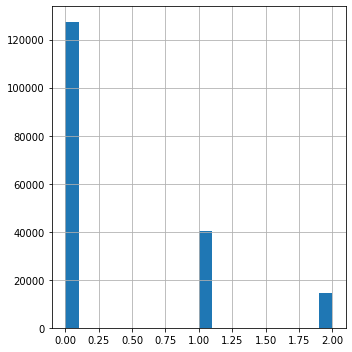

In [11]:
h = strat_train.engagement.hist(bins = 20, figsize = (5,5))
plt.tight_layout()

## Shuffle Split

In [12]:
from sklearn.model_selection import ShuffleSplit

split = ShuffleSplit(n_splits = 10, test_size = 0.25, random_state = 17)
for train_index, test_index in split.split(df, df.engagement):
    shuff_train = df.iloc[train_index][:]
    shuff_test = df.iloc[test_index][:]

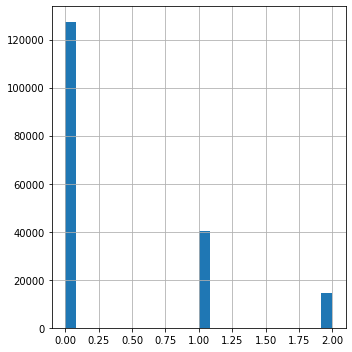

In [13]:
h2 = shuff_train.engagement.hist(bins = 24, figsize = (5,5))
plt.tight_layout()

## Compare ShuffleSplit vs Stratified Shuffle Split

,overall,stratified,shuffled,shuff_p_err,strat_p_err
0.0,0.699601,0.699605,0.699967,-0.052302,-0.000530
1.0,0.220253,0.220250,0.219806,0.203056,0.001235
2.0,0.080146,0.080145,0.080227,-0.101476,0.001235


Text(0.5, 1.0, '% err from overall')

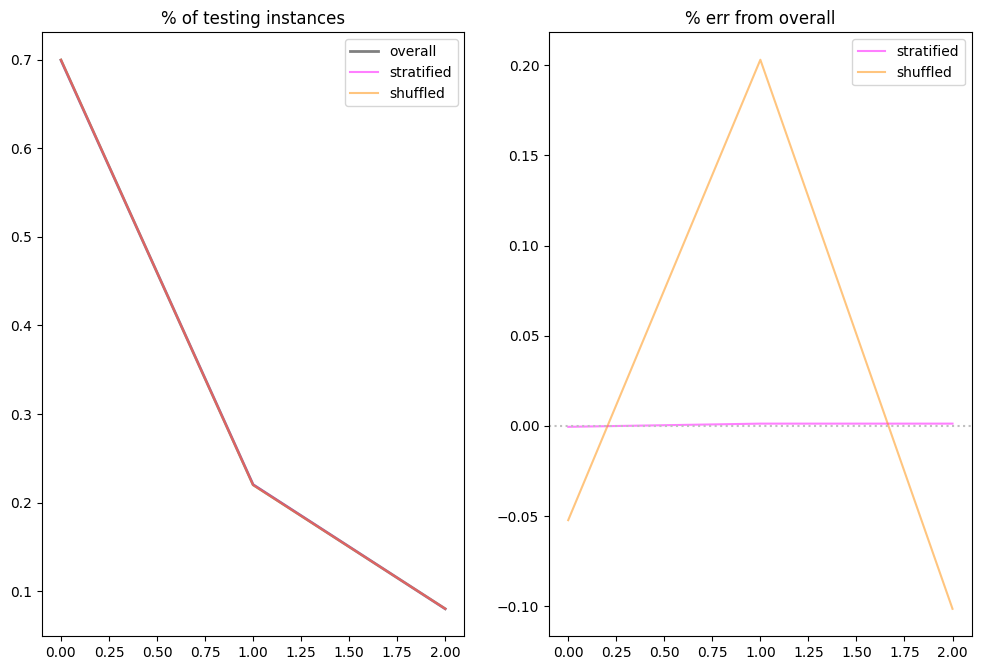

In [14]:
t = pd.DataFrame()
t['overall'] = df.engagement.value_counts()/len(df.index.values)
t['stratified'] = strat_test.engagement.value_counts()/len(strat_test.index.values)
t['shuffled'] = shuff_test.engagement.value_counts()/len(shuff_test.index.values)
t['shuff_p_err'] = 100 * (t.overall - t.shuffled)/ t.overall
t['strat_p_err'] = 100 * (t.overall - t.stratified)/ t.overall
t = t.sort_index()
display(HTML(t.to_html()))

fig, ax = plt.subplots(1,2, figsize = (12,8), dpi = 100)
ax[0].plot(t.index.values, t['overall'], alpha = 0.5, label = 'overall', color = 'black', lw = 2)
ax[0].plot(t.index.values, t['stratified'], alpha = 0.5, label = 'stratified', color = 'magenta')
ax[0].plot(t.index.values, t['shuffled'], alpha = 0.5, label = 'shuffled', color = 'darkorange')
handles, labels = ax[0].get_legend_handles_labels()
sampling_plot0 = ax[0].legend(handles, labels)
ax[0].set_title ('% of testing instances')
    
ax[1].plot(t.index.values, t['strat_p_err'], alpha = 0.5, label = 'stratified', color = 'magenta')
ax[1].plot(t.index.values, t['shuff_p_err'], alpha = 0.5, label = 'shuffled', color = 'darkorange')
handles, labels = ax[1].get_legend_handles_labels()
sampling_plot1 = ax[1].legend(handles, labels)
ax[1].axhline(0, ls = ':', color = 'silver')
ax[1].set_title ('% err from overall')
    
    ## Remove Category for Stratification from the dataset
#for set_ in (strat_train_set, strat_test_set):
 #   set_.drop(label, axis = 1, inplace = True)

## Stratified is the clear winner with the lowest error

In [15]:
strat_train.to_csv(os.path.join(cn.clean_dir,'time_stratified_train.csv'), index = False)
strat_test.to_csv(os.path.join(cn.clean_dir,'time_stratified_test.csv'), index = False)
strat_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 182217 entries, 256444 to 319260
Data columns (total 76 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   gear_score  182203 non-null  float64
 1   2015-01     108602 non-null  float64
 2   2016-01     108602 non-null  float64
 3   2017-01     108602 non-null  float64
 4   2018-01     108602 non-null  float64
 5   2019-01     108602 non-null  float64
 6   2020-01     108602 non-null  float64
 7   2015-02     108602 non-null  float64
 8   2016-02     108602 non-null  float64
 9   2017-02     108602 non-null  float64
 10  2018-02     108602 non-null  float64
 11  2019-02     108602 non-null  float64
 12  2020-02     108602 non-null  float64
 13  2015-03     108602 non-null  float64
 14  2016-03     108602 non-null  float64
 15  2017-03     108602 non-null  float64
 16  2018-03     108602 non-null  float64
 17  2019-03     108602 non-null  float64
 18  2020-03     108602 non-null  float64
 1

## Tuning the Random Forest Classifier

In [ ]:
No weights, no gear score
                precision    recall  f1-score   support

           0      0.827     0.984     0.899     26915
           1      0.877     0.522     0.654     10146
           2      0.926     0.317     0.472      1508

    accuracy                          0.836     38569
   macro avg      0.877     0.608     0.675     38569
weighted avg      0.844     0.836     0.818     38569

In [ ]:
No weights, with gear score
              precision    recall  f1-score   support

           0      0.862     0.973     0.914     27046
           1      0.839     0.627     0.717     10146
           2      0.961     0.362     0.526      1508

    accuracy                          0.859     38700
   macro avg      0.887     0.654     0.719     38700
weighted avg      0.859     0.859     0.847     38700

In [ ]:
6/240 weighted 1,7,5,15
            ind precision recall f1-score support
0             0     0.742  0.989    0.848   23642
1             1     0.707  0.113    0.195    3421
2             2     0.822  0.182    0.298    5114
3             3     0.823  0.144    0.246    1254
4      accuracy                     0.744   33431
5     macro_avg     0.773  0.357    0.397   33431
6  weighted_avg     0.753  0.744    0.674   33431
Plotting the confusion matrix...

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pickle

y_train = strat_train.engagement
X_train = strat_train.drop('engagement',axis = 1)
y_test = strat_test.engagement
X_test = strat_test.drop('engagement',axis = 1)


fig1, axes = plt.subplots( figsize=(10,10), dpi=100)
a = sns.distplot(df_original.engagement, color="darkcyan",  axlabel='status')
a.set_xticklabels(df_original.status, rotation = 45)
fig1.savefig(os.path.join(cn.clean_dir, 'pickles',
            'histplot_time_balanced.png'), dpi=180)


print("Start random forest...")

#class_weight = dict({0:1, 1:7, 2:5, 3:15})
#selected = RandomForestClassifier(bootstrap=True,
#            class_weight=class_weight, n_estimators=300,
#            oob_score=True,random_state=17)

selected = RandomForestClassifier(n_estimators = 300,n_jobs = -1,
                           oob_score = True,bootstrap = True,random_state = 17)
selected.fit(X_train, y_train)


print("Important Features...")
importances = selected.feature_importances_
indices = np.argsort(importances)
important_features = X_train.columns.values[indices]
for i, v in enumerate(important_features[:25]):
    print(i,v)


print("Making predictions...")
predictions = selected.predict(X_test)
df_pred = pd.DataFrame(X_test)
df_pred['prediction'] = predictions
df_pred['actual'] = y_test


print('Getting accuracy score...')
print(selected.score(X_train,y_train))


print('Oob score...')
print(selected.oob_score_)

print ("Making confusion matrix...")
# Print the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test,predictions)
print(cnf_matrix)

# Print the precision and recall, among other metrics
met = metrics.classification_report(y_test, predictions, digits=3)
folder = os.path.join(cn.clean_dir, 'pickles')
f_name = 'metrics_time_balanced_metrics.csv'
print(met)



print("Plotting the confusion matrix...")
fig2, ax = plt.subplots(figsize = (8,8))
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'viridis', fmt = 'g', annot_kws={"size":16})
ax.set_xlabel ("Predicted Value", fontsize = 18)
ax.set_ylabel ("Actual Value", fontsize = 18)
ax.tick_params (labelsize = 14)
plt.tight_layout()
fig2.savefig(os.path.join(cn.clean_dir, 'pickles','cnfmatrix_time_balanced.png'), dpi=180)

# save the model to disk
pickle_name = 'rf_time_balanced_model.sav'
os.chdir(os.path.join(cn.clean_dir, 'pickles'))
with open(pickle_name, 'wb') as file:
    pickle.dump(selected, file)
plt.show()